# Matplotlib and more NumPy -- MCEN 1030 -- 29 Oct

Today:
- Matplotlib for plotting
- Some NumPy problems

## Last time

... we talked about NumPy and how it can be used to make Python, a "high-level programming language", a bit faster and more convenient when doing numerical calculations. Important, e.g. in Computational Fluid Dynamics, where you may have 500k "cells", and the solution is obtained iteratively.

## Problem 1:

- Bring in the numpy package and call it np
- Create a time array that spans 0 to 10 with 1000 points
- Use np.sin(...) and np.absolute(...) to calculate $y=\left|\sin{(t)}\right|$


In [6]:
# code here
import numpy as np

t=np.linspace(0,10,1000)
y=np.absolute(np.sin(t))
print(np.max(y))

0.9999996994977832


## Matplotlib

Python and NumPy don't have plotting tools, or at least not good ones. So let's bring in another package, one that specializes in plotting: Matplotlib.

It is a rip-off of MATLAB's plot... I think the creators even admit it. To plot two arrays (assuming you imported the relevant package and called it plt):

    plt.plot(x,y)
    plt.show() # not necessary in Jupyter, but necessary in a py file

and we can change colors and line styles with

    plt.plot(x,y,'b-')

just like in MATLAB.

### Problem 2:

Define a function that creates a major chord. The inputs are the time variable, t, the fundamental frequency, w, and the amplitudes of the three notes, A1, A3, A5. The major third frequency is 5/4 that of the fundamental frequency, and the perfect fifth frequency is 3/2 that of the fundamental frequency. So... 

$$y=A_1 \sin{(\omega t)}+A_3 \sin{(5\omega t/4)}+A_5 \sin{(3\omega t/2)}$$
The output will be y, an output signal for each time value. Once you have returned the signal, create a plot of y(t) using Matplotlib.



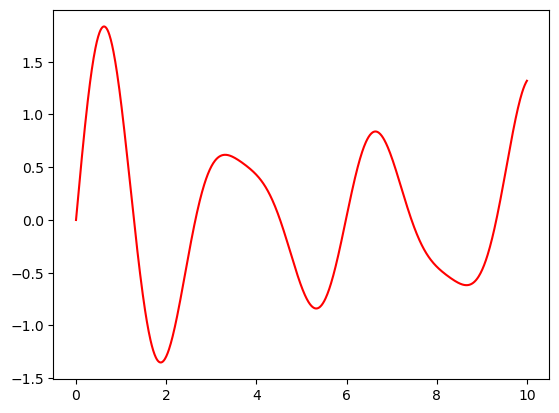

In [9]:
import numpy as np # technically we don't need to import this again
import matplotlib.pyplot as plt # there are more things in this package, but this is the one you'll mostly be using.

# code here
def majorchord(t,w,A1,A3,A5):
    y=A1*np.sin(w*t)+A3*np.sin(5/4*w*t)+A5*np.sin(3/2*w*t)
    return y

# Create a time array that spans 0 to 10 with 1000 points
t_in=np.linspace(0,10,1000)

# call the function with whatever inputs you like
y_out=majorchord(t_in,2.1,1,0.5,0.4)

# plot the signal
plt.plot(t_in,y_out,'r-')
plt.show()


### Problem 3:

How could we determine the solution to $5\sin{(\ln(x))}=1$ between $10 \leq x \leq 30$?





We can create an array $x$ with pretty fine detail over that range, and then find the minimum of the **absolute value** of $5\sin{(\ln(x))}-1$. We will try writing it out with np.absolute(...), np.log(...), np.argmin(...) (which returns the INDEX at which the minimum occurs) ... 

There are a few downsides to this approach:
- This is a "brute-force" method, meaning we test/operate on literally every point. In MCEN 3030 we won't let you use this approach... there are more elegant methods in which we could solve this using a small fraction of the operations.
- Related: there is a trade-off... we can test fewer points to make it faster, but our accuracy is always $\pm(\text{the x spacing})$.
- What if the solution can't be found in the range.

In [11]:
# code here

x=np.linspace(10,30,50)
y=np.absolute(5*np.sin(np.log(x))-1)
idx=np.argmin(y)
print(idx)
print(y[idx])

22
0.015336498933437137
